# Metodo Montecarlo
Inspirado en los datos y metodologia de https://pbpython.com/author/chris-moffitt.html con agregados para mejor visualización y desarrollo estadistico


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(66261034)

Tengase data de la forma de vendedores, que calculamos cuanto de su plan de venta consiguieron y dependiendo de ese porcentaje reciben un porcentaje de comisión, en base a ese porcentaje y cuanto vendieron se define cuanto ganan

In [18]:
sales_rep = [1,2,3,4,5]
sales_targ = [150000, 200000, 400000, 500000,75000]
actual_sales = [88000, 202000,90000,360000,35000]

def tabla_ventas(sales_rep, sales_targ, actual_sales):
    df = pd.DataFrame({
        'sales_representant': sales_rep, 'sales_target': sales_targ,
        'sales_real': actual_sales
    })

    df['percent_plan'] = df.sales_real / df.sales_target
    def commision_rate(p):
        if p < 0.7:
            return 0
        elif p < 0.8:
            return 0.02
        elif p < 0.99:
            return 0.03
        elif p >= 0.99:
            return 0.04

    df['commision_rate'] =  list(map(commision_rate, df.percent_plan))
    df['commision'] = df.commision_rate * df.sales_real
    return df

df = tabla_ventas(sales_rep, sales_targ, actual_sales)
df

,sales_representant,sales_target,sales_real,percent_plan,commision_rate,commision
0,1,150000,88000,0.586667,0.00,0.0
1,2,200000,202000,1.010000,0.04,8080.0
2,3,400000,90000,0.225000,0.00,0.0
3,4,500000,360000,0.720000,0.02,7200.0
4,5,75000,35000,0.466667,0.00,0.0


In [19]:
# y hemos de pagar un total de:
df.sum().commision

15280.0

Se nos da el problema de cuanto dinero deberiamos guardar para pagarle a los empleados, 
# Forma facil pero poco realista
si asumimos que todos logran el 100% de su meta nos entregaria 

In [20]:
df100 = tabla_ventas(sales_rep, sales_targ, sales_targ)
df100

,sales_representant,sales_target,sales_real,percent_plan,commision_rate,commision
0,1,150000,150000,1.0,0.04,6000.0
1,2,200000,200000,1.0,0.04,8000.0
2,3,400000,400000,1.0,0.04,16000.0
3,4,500000,500000,1.0,0.04,20000.0
4,5,75000,75000,1.0,0.04,3000.0


In [21]:
# y hemos de pagar un total de:
df100.sum().commision

53000.0

el problema aqui es que es muy poco probable que todos hagan el 100%, esta situacion no tiene muchas cosas en cuenta

# Metodo Montecarlo

Gracias a que existe una base de datos, sabemos que se comporta como una variable normal el porcentaje de comisión, con una media y una desviacion estandar historica

Definimos la variable aleatoria, podriamos tomar la cantidad de ventas que realizan, o directamente el porcentaje que venden:

$X$ : Porcentaje de ventas, de 0 a infinito

$X$ sigue una distribución normal, con media $1$ (100%) y desviacion estandar de $0.1$ (10%)

$$X : N(\mu=1, \sigma = 0.1)$$

Entonces generaermo 300 vendedores aleatorios, y el resultado de la suma bastara con dividirlo por 20, para crear esta especie de promedio


In [22]:
mu = 1
sigma = 0.1
n_vendedores = 300 # generaremos 300 muestras: dividir por 60
N_sim = 100 # numero de simulaciones a realizar

In [23]:
np.random.normal(mu, sigma, n_vendedores).round(2)

array([1.07, 1.14, 0.87, 1.08, 0.87, 0.89, 0.89, 0.96, 1.14, 0.9 , 0.94,
       1.11, 1.05, 1.02, 0.81, 0.9 , 0.93, 1.04, 0.99, 0.92, 0.96, 0.94,
       1.1 , 0.93, 0.9 , 0.98, 1.02, 1.03, 1.09, 1.05, 1.02, 0.91, 0.91,
       1.07, 0.98, 0.89, 0.92, 0.96, 1.02, 1.01, 1.04, 1.07, 1.09, 0.9 ,
       0.92, 1.12, 1.06, 0.84, 0.88, 1.18, 0.95, 1.01, 0.92, 1.07, 1.  ,
       0.74, 0.77, 1.19, 1.16, 1.16, 0.91, 1.05, 1.07, 0.91, 1.2 , 0.96,
       1.12, 1.08, 1.14, 1.1 , 1.04, 0.93, 0.97, 1.09, 0.92, 0.93, 1.14,
       1.12, 0.92, 0.93, 0.98, 0.95, 1.04, 1.01, 0.82, 1.01, 0.82, 1.22,
       0.79, 1.08, 0.89, 1.  , 1.  , 1.08, 1.  , 1.03, 0.98, 1.03, 1.16,
       0.97, 1.01, 1.03, 0.98, 1.03, 0.85, 0.9 , 1.12, 0.75, 1.01, 1.15,
       1.  , 0.94, 1.03, 1.02, 1.08, 0.97, 0.92, 0.99, 0.92, 0.98, 1.18,
       0.94, 0.9 , 0.79, 1.08, 0.94, 1.05, 1.07, 0.97, 0.86, 1.02, 1.03,
       0.86, 1.24, 0.91, 1.09, 1.06, 1.18, 0.92, 0.82, 0.96, 1.16, 0.84,
       1.01, 0.88, 0.7 , 0.94, 1.04, 0.99, 1.02, 0.

mientras que el dinero que suelen pedir es muy comun encontrarlo en los 100000 y rapidamente disminuye mientras aumenta la cantidad, podemos usar una distribucion exponencial para hacerlo similar

$$
f(x;\lambda) = \lambda e^{-\lambda x}
$$

donde numpy.random.exponential($\beta$)
$$
\beta = \frac{1}{\lambda}
$$

en esta distribución, el valor esperado es $\beta$
$$
\mathbb E[X] = \frac{1}{\lambda}
$$

(array([58., 29.,  9.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  1005.27 ,  88315.089, 175624.908, 262934.727, 350244.546,
        437554.365, 524864.184, 612174.003, 699483.822, 786793.641,
        874103.46 ]),
 <BarContainer object of 10 artists>)

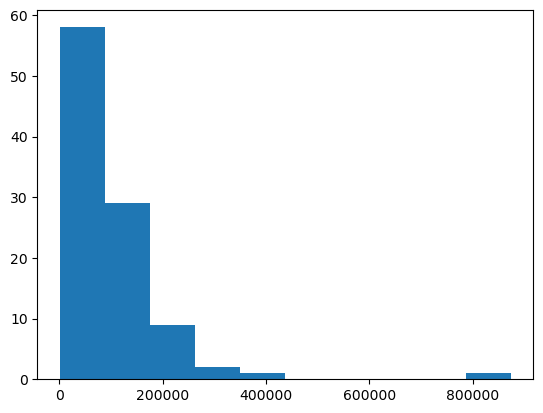

In [24]:
parametro_beta = 100000 # elegido sin ningun argumento atras
exponential_values = np.random.exponential(parametro_beta, 100).round(2)
plt.hist(exponential_values)

## explicación exponencial
$$ \lambda e^{-\lambda x} $$

$\lambda$ es proporcional a que tan rapido ocurren las cosas, en este caso será la meta que se le dio a cada persona.

### Estimación de parametros: Maxima Similitud
es sumamente importante que paramtro le damos a la distribución, por ello hemos de utilizar una estimación de parametro. Se trata de utilizar los datos historicos asumiendo que conocemos su distribución y mediante el proceso de estimación de parametros seremos capaces de generar data aleatoria con la misma distribución.

Esto es un extra, creamos la función de similitud para encontrar el mejor parametro para $\lambda$
$$
L(\lambda) = \Pi_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n \exp( -\lambda \sum_{i=1}^n  x_i) = \lambda^n e^{-\lambda n \bar x}
$$

donde
$$
\bar x = \frac{1}{n} \sum_{i=1}^n x_i
$$

La meta de similitud maxima es obtener el parametro dado una muestra de datos tengamos un parametro ($\lambda$) que maximice la similitud, estamos frente a un problema de maximos, por tanto tomamos la derivada con respoectoa  lambda y la hacemos 0

$$
\frac{d}{d\lambda} L(\lambda) = \frac{d}{d\lambda} \lambda^n e^{-\lambda n \bar x} = 0
$$
derivada de un producto
$$
n \lambda^{n-1} e^{-\lambda n \bar x} - n \bar x \lambda^{n} e^{-\lambda n \bar x} = 0
$$
igualando a 0 despejamos
$$
\frac{n}{\lambda} - n \bar x = 0 \Rightarrow \lambda = \frac{1}{\bar x}
$$

### Bias
este tema no es necesario entenderlo y es mas que nada estadistico:

un estimador sin bias cumplira que el valor de expectación del paramtro estimado $\hat \lambda$ sera igual al parametro poblacional:
$$
E[\hat \lambda] = \lambda
$$

si $X$ tiene distribucion exponencial $Exp(\lambda)$ entonces la suma $\sum^n X$ tiene distribucion $Gamma(n,\lambda)$, definimos $y= \sum_{i=1}^n x_i$

entonces:
$$
E[\hat \lambda] = E[\frac{n}{\sum_{i=1}^n x_i }] = E[\frac{n}{y}] = n E[\frac{1}{y}]
$$

donde la distribución o función de densidad de la gamma:
$$
f_{\lambda,n}(y) = \frac{\lambda^n}{\Gamma(n)} y^{n-1} e^{- y \lambda}
$$

asi el valor esperado queda de la forma:
$$
n E[\frac{1}{y}]= n \int_0^\infty \frac{1}{y} f_{\lambda,n}(y)dy = n  \int_0^\infty  \frac{1}{y}  \frac{\lambda^n}{\Gamma(n)} y^{n-1} e^{- y \lambda} dy
$$

$$

n \frac{\lambda^n}{\Gamma(n)} \int_0^\infty y^{n-2} e^{- \lambda y} dy = \frac{n}{n-1} \lambda
$$

entonces el estimador sin bias:
$$
\hat \lambda^* = \frac{n-1}{\sum x_i}
$$



Text(0.5, 0, 'Ventas en dolares $')

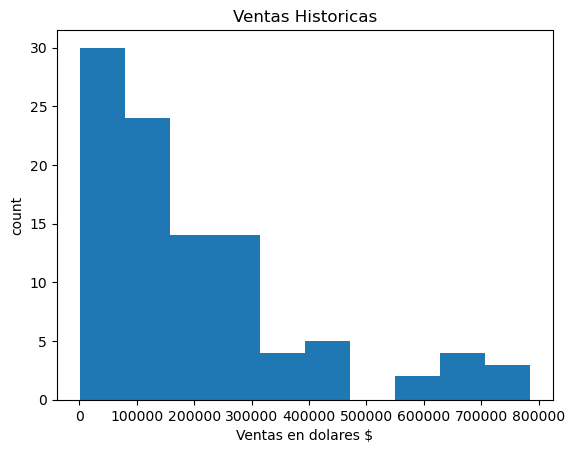

In [25]:
# datos historicos
df_historic = pd.DataFrame({'sales_real': [9.4651870e+04, 2.2567869e+05, 1.0414970e+04, 1.7153867e+05,
       1.3291690e+05, 3.9743300e+03, 3.1119388e+05, 3.9062200e+04,
       7.6429130e+04, 2.0845520e+05, 3.0458035e+05, 6.8118372e+05,
       1.0586740e+05, 1.7577691e+05, 9.0652680e+04, 2.8135934e+05,
       4.7970240e+04, 1.0747513e+05, 2.3721303e+05, 2.4840126e+05,
       6.5103872e+05, 8.2392260e+04, 2.6064020e+04, 1.8195884e+05,
       1.0198801e+05, 2.0214200e+03, 7.7409720e+04, 4.0968280e+04,
       1.3835895e+05, 5.7914850e+05, 4.6806163e+05, 2.6947980e+04,
       9.6177420e+04, 8.3484150e+04, 7.4401070e+05, 7.9820330e+04,
       2.0910671e+05, 1.4230083e+05, 1.4822600e+03, 2.3986471e+05,
       1.3495408e+05, 3.4497318e+05, 2.2632324e+05, 1.3484753e+05,
       4.3565544e+05, 1.6811261e+05, 2.4214644e+05, 1.9898900e+04,
       4.7771280e+04, 1.8006828e+05, 5.5981140e+04, 1.9002600e+04,
       1.5773789e+05, 1.1705400e+04, 7.8588798e+05, 5.8413100e+04,
       3.0007275e+05, 3.6624000e+02, 2.6231100e+03, 1.0628789e+05,
       1.3983883e+05, 1.4193123e+05, 4.4016700e+03, 3.7642990e+04,
       4.3731386e+05, 1.8565072e+05, 4.3422221e+05, 1.7287387e+05,
       1.9237808e+05, 1.1987788e+05, 5.8329457e+05, 7.2904003e+05,
       4.9068990e+04, 3.8234091e+05, 3.0702839e+05, 1.6743120e+04,
       1.4721135e+05, 1.7271740e+04, 7.0335740e+04, 3.4139286e+05,
       9.5258580e+04, 8.0414250e+04, 1.8260782e+05, 1.7584520e+04,
       1.5397585e+05, 6.5328709e+05, 5.3808520e+04, 1.3352290e+04,
       3.0290700e+03, 2.4652168e+05, 8.9525530e+04, 2.9590977e+05,
       3.0879331e+05, 2.2573770e+04, 2.4160174e+05, 3.1608780e+05,
       4.4593288e+05, 6.3110842e+05, 1.2344799e+05, 2.6446813e+05] })

plt.hist(df_historic.sales_real)
plt.title('Ventas Historicas')
plt.ylabel('count')
plt.xlabel('Ventas en dolares $')

Notesé la similitud en las distribuciones

lambda: 5.022989443867532e-06
beta = 1/ lambda = 199084.631010101


Text(0.5, 0, 'Ventas en 1 millon dolares: 1e6 = 1000000$ ')

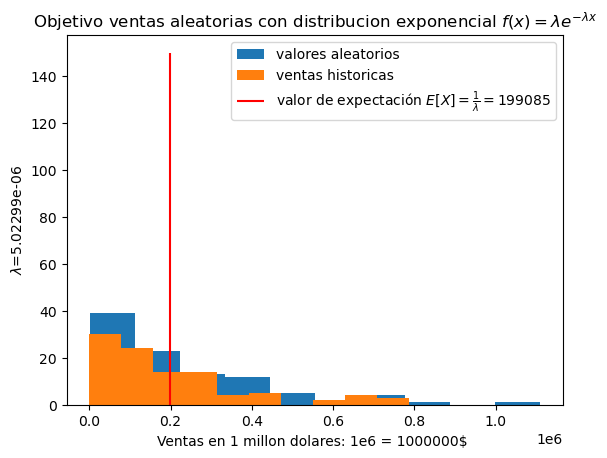

In [39]:
data = df_historic
n = len(data.sales_real)
parametro_lambda = (n-1) / (data.sales_real.sum())

print(f"lambda: {parametro_lambda}")
print(f"beta = 1/ lambda = {1/parametro_lambda}")

# Creamos la distribucion
N = len(df_historic)
parametro_beta = 1/parametro_lambda # elegido sin ningun argumento atras
montecarlo_values = np.random.exponential(parametro_beta, N).round(2)
# --------------------------------------

plt.hist(montecarlo_values,
    label='valores aleatorios')
plt.hist(data.sales_real,
    label='ventas historicas')

plt.title(r'Objetivo ventas aleatorias con distribucion exponencial $f(x) = \lambda e^{-\lambda x}$')

plt.ylabel(r'$\lambda$' + f'={parametro_lambda:.6}')
plt.vlines(parametro_beta, 0, 150, 
    label=r'valor de expectación $E[X] = \frac{1}{\lambda}=$' + f'{parametro_beta:.0f}', colors='r')
plt.legend()
plt.xlabel(f'Ventas en 1 millon dolares: 1e6 = {10**6}$ ')

ahora la capacidad extra que tenemos es la de generar una mayor cantidad de datos, superando la cantidad historica pero con la misma distribución

Text(0.5, 0, 'Ventas en 1 millon dolares: 1e6 = 1000000$ ')

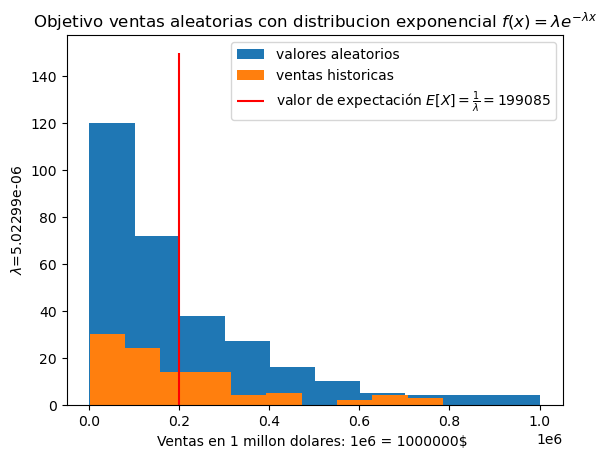

In [40]:
# Creamos la distribucion
N = 300
parametro_beta = 1/parametro_lambda # elegido sin ningun argumento atras
montecarlo_values = np.random.exponential(parametro_beta, N).round(2)
# --------------------------------------

plt.hist(montecarlo_values,
    label='valores aleatorios')
plt.hist(data.sales_real,
    label='ventas historicas')

plt.title(r'Objetivo ventas aleatorias con distribucion exponencial $f(x) = \lambda e^{-\lambda x}$')

plt.ylabel(r'$\lambda$' + f'={parametro_lambda:.6}')
plt.vlines(parametro_beta, 0, 150, 
    label=r'valor de expectación $E[X] = \frac{1}{\lambda}=$' + f'{parametro_beta:.0f}', colors='r')
plt.legend()
plt.xlabel(f'Ventas en 1 millon dolares: 1e6 = {10**6}$ ')

generamos la nueva tabla de ventas con estos datos aleatorios:

In [49]:
N = 300

# objetivo de ventas: distribucion exponencial
objetivo_ventas = np.random.exponential(parametro_beta, N).round(2)
# porcentjae de ventas: distribucion normal
mu = 1.0
sigma = 0.1
porcentaje_ventas = np.random.normal(mu, sigma, N).round(2)

In [50]:
df_mc = pd.DataFrame({
    'sales_targ': objetivo_ventas,
    'percent_plan': porcentaje_ventas
})

df_mc['sales_real'] = df_mc['sales_targ'] * df_mc['percent_plan']
df_mc['commision_rate'] =  list(map(commision_rate, df_mc['percent_plan']))
df_mc['commision'] = df_mc['commision_rate'] * df_mc['sales_real']

In [51]:
df_mc.head()

,sales_targ,percent_plan,sales_real,commision_rate,commision
0,136554.41,1.20,163865.2920,0.04,6554.611680
1,394.44,0.96,378.6624,0.03,11.359872
2,304326.32,1.12,340845.4784,0.04,13633.819136
3,199835.04,0.87,173856.4848,0.03,5215.694544
4,250760.53,0.89,223176.8717,0.03,6695.306151


In [52]:
# Entonces el promedio o valor de expectación
# para cuanto dinero guardar para pagar
(df_mc.commision.sum() / 60).round(0)

32686.0

In [47]:
# una gran diferencia a cuando asumimos un 100%
df100.sum().commision

53000.0

# Como se haria esto de forma compacta?

Crearemos un loop, cada loop es el subproblema que acabamos de hacer, osea correremos varias veces el algoritmo montecarlo y asi observaremos la distribución de este y el valor esperado de correr varias veces la simulación

In [86]:
## porcentjae de ventas: distribucion normal
mu = 1.0
sigma = 0.1

#  dado que tengamos los parametros, entregamos la cantidad que deseamos generar
n_real_vendedores = 5
n_vendedores_simulacion = 300 
divisor_para_corregir = n_vendedores_simulacion / n_real_vendedores
N_simulaciones = 30

# guaradr los data points
comision_data_points = []


for _ in range(N_simulaciones):

    # objetivo de ventas: distribucion exponencial
    objetivo_ventas = np.random.exponential(parametro_beta, n_vendedores_simulacion).round(2)
    porcentaje_ventas = np.random.normal(mu, sigma, n_vendedores_simulacion).round(2)

    # todo esto es desde crear el data frame y evaluarlo
    ventas_reales = objetivo_ventas * porcentaje_ventas
    ratio_comision = list(map(commision_rate, porcentaje_ventas))
    comision = ratio_comision * ventas_reales

    # promediamos la comisión que deseamos pagar suponiendo 5 empleados
    comision_promedio_para_n_vendedores_reales = comision.sum() / divisor_para_corregir
    comision_data_points.append(comision_promedio_para_n_vendedores_reales)


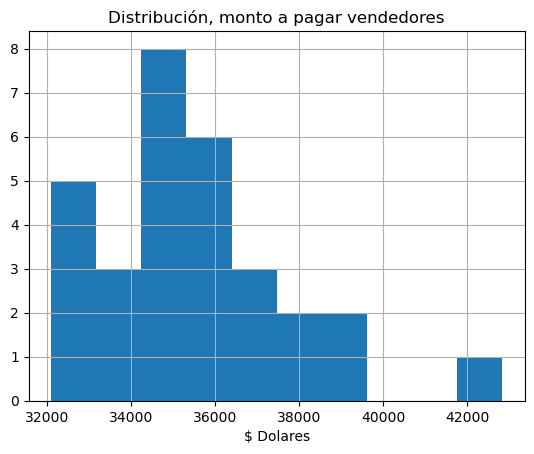

In [107]:

plt.title('Distribución, monto a pagar vendedores')
plt.xlabel('$ Dolares')
plt.grid()
plt.hist(comision_data_points)
plt.show()

visualicemos como evoluciona el promedio al ir agregando estos puntos, necesitamos ver si se establece en un intervalo u oscila eternamente (en tal caso, habriamos de realizar correciones)

In [69]:
comision_data_points = [31952, 35997, 32292, 37855, 36922, 32183]

[]

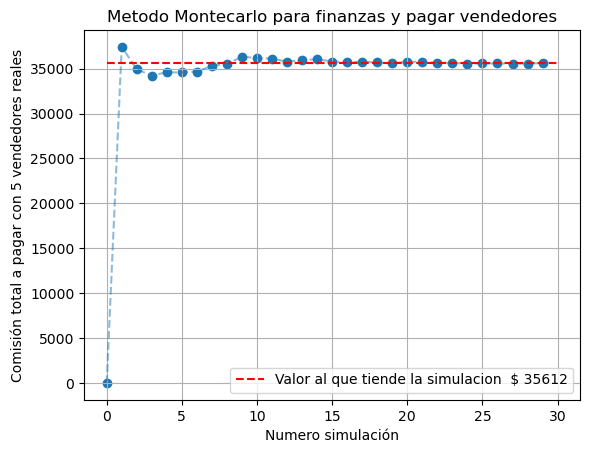

In [103]:
n_data_points = len(comision_data_points)

index_simulation = np.array([i for i in range(n_data_points)])
mean_simulation_at_index = np.zeros(n_data_points)

for i in range(1,n_data_points):
     mean_simulation_at_index[i] =  np.mean(comision_data_points[:i])
    
plt.scatter(index_simulation, mean_simulation_at_index)
plt.plot(index_simulation, mean_simulation_at_index, '--', alpha=0.5)
plt.grid()
plt.title(f'Metodo Montecarlo para finanzas y pagar vendedores')
plt.xlabel('Numero simulación')
plt.ylabel(f'Comisión total a pagar con {n_real_vendedores} vendedores reales')
plt.hlines( 
    y = mean_simulation_at_index[-1],
    xmin = 0,
    xmax= N_simulaciones,
    label = f"Valor al que tiende la simulacion  ${mean_simulation_at_index[-1]: .0f}",
    linestyles='--',
    color = 'red'
)
plt.legend()
plt.plot()